# Projet : Deep Learning
*Par Arthur Couturier, Enzo Di Maria, José Colin, Rémi Bonrepaux & Yassir El Bista*

<b> Classification d'images de fruits </b> : *apples, bananas, coconuts, grapes, lemons, limes, mangos, oranges, pineapples, tomatoes*.

In [5]:
import os
import sys
import shutil
import numpy as np
import PIL
from PIL import Image
from scipy.io import loadmat
import matplotlib.pyplot as plt

<b> Accès à la base de données </b>
1. Vous utilisez Google Colab. Dans ce cas vous devrez cloner le dépôt GitHub en exécutant la portion (1) du code ci-dessous.
2. Vous utilisez Visual Studio Code ou Jupyter Notebook. Dès lors, vous devrez simplement exécuter la portion (2) du code.

In [6]:
# Version distante (1)
# !git clone https://github.com/EnzoN7/Image-classification.git
# path = "./Image-classification/images/"
# sys.path.insert(1, "./Image-classification/scripts/")

# Version locale (2)
path = "./images/"
sys.path.insert(1, "./scripts")

from LoadData import load_data

<b> Stockage des fichiers au sein de tenseurs </b>

In [7]:
labels = ['apples', 'bananas', 'coconuts', 'grapes', 'lemons', 'limes', 'mangos', 'oranges', 'pineapples', 'tomatoes']

x_train, y_train = load_data(path, labels, dataset='train', image_size=64)
x_val, y_val = load_data(path, labels, dataset='validation', image_size=64)
x_test, y_test = load_data(path, labels, dataset='test', image_size=64)

x_train.shape = (1875, 64, 64, 3)
y_train.shape = (1875, 1)


  0% (0 of 10) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 10% (1 of 10) |##                       | Elapsed Time: 0:00:06 ETA:   0:00:55
 20% (2 of 10) |#####                    | Elapsed Time: 0:00:08 ETA:   0:00:16
 30% (3 of 10) |#######                  | Elapsed Time: 0:00:11 ETA:   0:00:21
 40% (4 of 10) |##########               | Elapsed Time: 0:00:14 ETA:   0:00:19
 50% (5 of 10) |############             | Elapsed Time: 0:00:16 ETA:   0:00:10
 60% (6 of 10) |###############          | Elapsed Time: 0:00:18 ETA:   0:00:07
 70% (7 of 10) |#################        | Elapsed Time: 0:00:21 ETA:   0:00:10
 80% (8 of 10) |####################     | Elapsed Time: 0:00:23 ETA:   0:00:05
 90% (9 of 10) |######################   | Elapsed Time: 0:00:28 ETA:   0:00:05
100% (10 of 10) |########################| Elapsed Time: 0:00:28 Time:  0:00:28


x_validation.shape = (1130, 64, 64, 3)
y_validation.shape = (1130, 1)


  0% (0 of 10) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 10% (1 of 10) |##                       | Elapsed Time: 0:00:03 ETA:   0:00:32
 20% (2 of 10) |#####                    | Elapsed Time: 0:00:05 ETA:   0:00:21
 30% (3 of 10) |#######                  | Elapsed Time: 0:00:06 ETA:   0:00:10
 40% (4 of 10) |##########               | Elapsed Time: 0:00:08 ETA:   0:00:09
 50% (5 of 10) |############             | Elapsed Time: 0:00:09 ETA:   0:00:08
 60% (6 of 10) |###############          | Elapsed Time: 0:00:11 ETA:   0:00:08
 70% (7 of 10) |#################        | Elapsed Time: 0:00:14 ETA:   0:00:06
 80% (8 of 10) |####################     | Elapsed Time: 0:00:15 ETA:   0:00:03
 90% (9 of 10) |######################   | Elapsed Time: 0:00:16 ETA:   0:00:01
100% (10 of 10) |########################| Elapsed Time: 0:00:16 Time:  0:00:16


x_test.shape = (1141, 64, 64, 3)
y_test.shape = (1141, 1)


  0% (0 of 10) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
 10% (1 of 10) |##                       | Elapsed Time: 0:00:00 ETA:   0:00:08
 20% (2 of 10) |#####                    | Elapsed Time: 0:00:01 ETA:   0:00:05
 30% (3 of 10) |#######                  | Elapsed Time: 0:00:03 ETA:   0:00:07
 40% (4 of 10) |##########               | Elapsed Time: 0:00:04 ETA:   0:00:08
 50% (5 of 10) |############             | Elapsed Time: 0:00:06 ETA:   0:00:10
 60% (6 of 10) |###############          | Elapsed Time: 0:00:09 ETA:   0:00:10
 70% (7 of 10) |#################        | Elapsed Time: 0:00:10 ETA:   0:00:06
 80% (8 of 10) |####################     | Elapsed Time: 0:00:11 ETA:   0:00:02
 90% (9 of 10) |######################   | Elapsed Time: 0:00:14 ETA:   0:00:02
100% (10 of 10) |########################| Elapsed Time: 0:00:14 Time:  0:00:14


<b> Affichage d'une sélection d'images aléatoire pour vérifier que l'importation s'est bien déroulée </b>

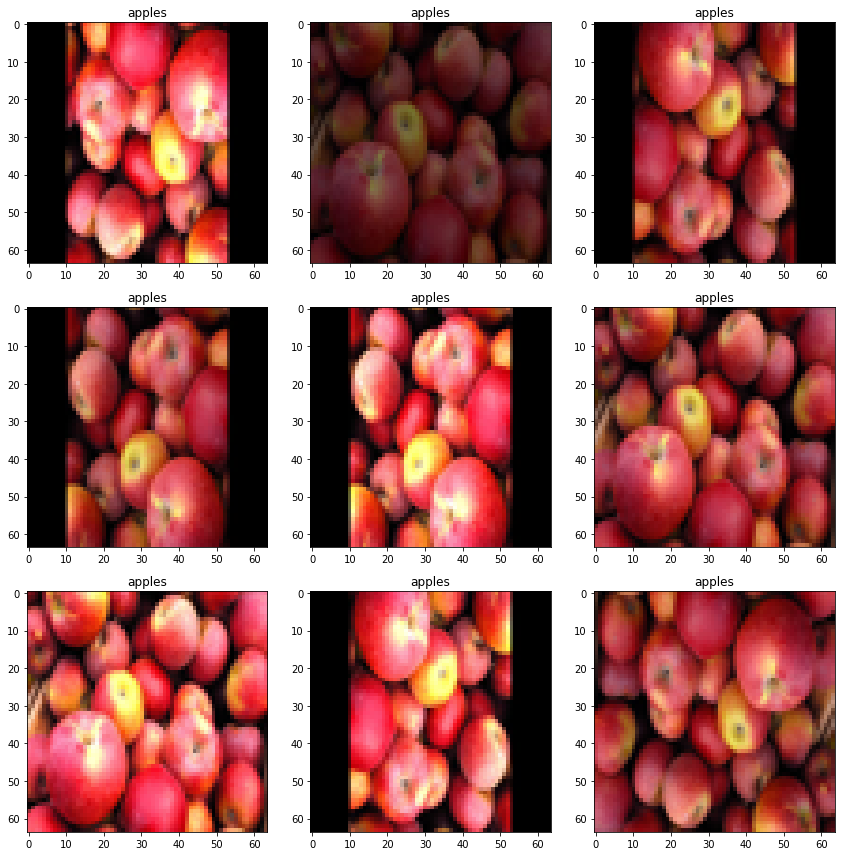

In [8]:
plt.figure(figsize=(12, 12))
shuffle_indices = np.random.permutation(9)
for i in range(0, 9):
    plt.subplot(3, 3, i+1)
    image = x_train[shuffle_indices[i]]
    plt.title(labels[int(y_train[shuffle_indices[i]])])
    plt.imshow(image/255)

plt.tight_layout()
plt.show()

<b>Création d'un modèle</b>

In [ ]:
# Normalisation des entrées via une division par 255 des valeurs de pixel.
x_train = x_train / 255
x_val = x_val / 255
x_test = x_test / 255